## NY2017 EDA And Prediction 

In [1]:
#importing librarys 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('NY2017.csv', low_memory=False)
display(df.head())
df.shape

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05


(2343569, 34)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

In [4]:
df.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,2.338414e+06,2.338414e+06,2343569.0,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06
mean,4.985786e+06,1.038981e+03,2017.0,1.898732e+02,1.013995e+02,4.161805e+02,1.031093e+01,2.020746e+00,4.972380e+04,1.664735e+04
std,2.263244e+06,7.202281e+02,0.0,1.649453e+02,8.681581e+01,2.424942e+02,5.900304e+00,8.891484e-01,9.524129e+04,4.377389e+04
min,1.010000e+05,1.000000e+00,2017.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,2017.0,1.010000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.353980e+04,4.784650e+03
50%,5.904001e+06,1.097000e+03,2017.0,1.570000e+02,9.800000e+01,3.830000e+02,9.000000e+00,2.000000e+00,2.657496e+04,8.924510e+03
75%,7.002017e+06,1.453000e+03,2017.0,2.180000e+02,1.800000e+02,6.400000e+02,1.500000e+01,3.000000e+00,5.310669e+04,1.728076e+04
max,7.004010e+06,9.431000e+03,2017.0,2.617000e+03,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.696645e+06,8.868613e+06


 -   After running the codes above i have a rundown of the data 

## Cleaning The Data 

Birth Weight             90.276198
Payment Typology 3       74.128135
Payment Typology 2       37.495034
Zip Code - 3 digits       1.664939
Hospital Service Area     0.219964
dtype: float64

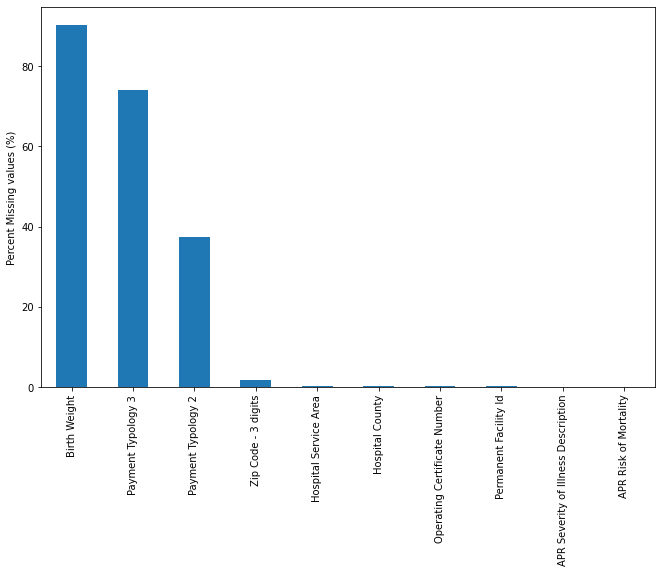

In [5]:
df_missing = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending = False)/len(df)*100
df_missing.plot.bar(figsize = (11,7), ylabel = 'Percent Missing values (%)')
df_missing.head()

- This is a histogram showing the missing values i will drop the columns that exceed 70% 

In [6]:
df['Length of Stay1'] = df['Length of Stay'].replace('120 +',120, inplace = True)
df['Length of Stay1'] = df['Length of Stay'].astype('float64')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 35 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

- The Lenght of Stay had an error and was in another dtype so i made some changes 

In [7]:
df =  df.drop(['Birth Weight','Payment Typology 3','Zip Code - 3 digits','Operating Certificate Number','Facility Name','Permanent Facility Id','Length of Stay'], axis = 1)
print(df.shape)

(2343569, 28)


- I dropped the two columns that exceeded 70% and a few that i deemed useless 

In [8]:
cat_list = [words for words in df.columns if df[words].dtype == 'object' ]
num_list = [num for num in df.columns if df[num].dtype in ['int64' or 'float64']]
display(f'coluimns with categorical values{cat_list}')
display(f'columns with integers{num_list}')

"coluimns with categorical values['Hospital Service Area', 'Hospital County', 'Age Group', 'Gender', 'Race', 'Ethnicity', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Payment Typology 2', 'Abortion Edit Indicator', 'Emergency Department Indicator']"

"columns with integers['Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code']"

- The code above creates a list of the columns with categorical data and numerical data and stores is it 

In [9]:
num_imp = SimpleImputer(strategy = 'median')
cat_imp = SimpleImputer(strategy = 'most_frequent')
df[cat_list] = cat_imp.fit_transform(df[cat_list])
df[num_list] = num_imp.fit_transform(df[num_list])
df.isna().sum()
#display(df.tail())

Hospital Service Area                  0
Hospital County                        0
Age Group                              0
Gender                                 0
Race                                   0
Ethnicity                              0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Payment Typology 1                     0
Payment Typology 2                     0
Abortion Edit Indicator                0
Emergency Depart

- I was unable to use the fillna function to fill the missing values so i used sklearn's OneHotEncoder  

In [10]:
#df['Ethnicity'].replace('Unknown',np.nan ,inplace = True)
print(df['Ethnicity'].head())

0    Not Span/Hispanic
1     Spanish/Hispanic
2              Unknown
3    Not Span/Hispanic
4     Spanish/Hispanic
Name: Ethnicity, dtype: object


- the Unknown value can be one of the reasons why this person did not stay long in the hospital so i will leave it for now and let it be a parameter

### Exploratory Data Analysis (EDA)

array([[<AxesSubplot:title={'center':'Discharge Year'}>,
        <AxesSubplot:title={'center':'CCS Diagnosis Code'}>,
        <AxesSubplot:title={'center':'CCS Procedure Code'}>],
       [<AxesSubplot:title={'center':'APR DRG Code'}>,
        <AxesSubplot:title={'center':'APR MDC Code'}>,
        <AxesSubplot:title={'center':'APR Severity of Illness Code'}>],
       [<AxesSubplot:title={'center':'Total Charges'}>,
        <AxesSubplot:title={'center':'Total Costs'}>,
        <AxesSubplot:title={'center':'Length of Stay1'}>]], dtype=object)

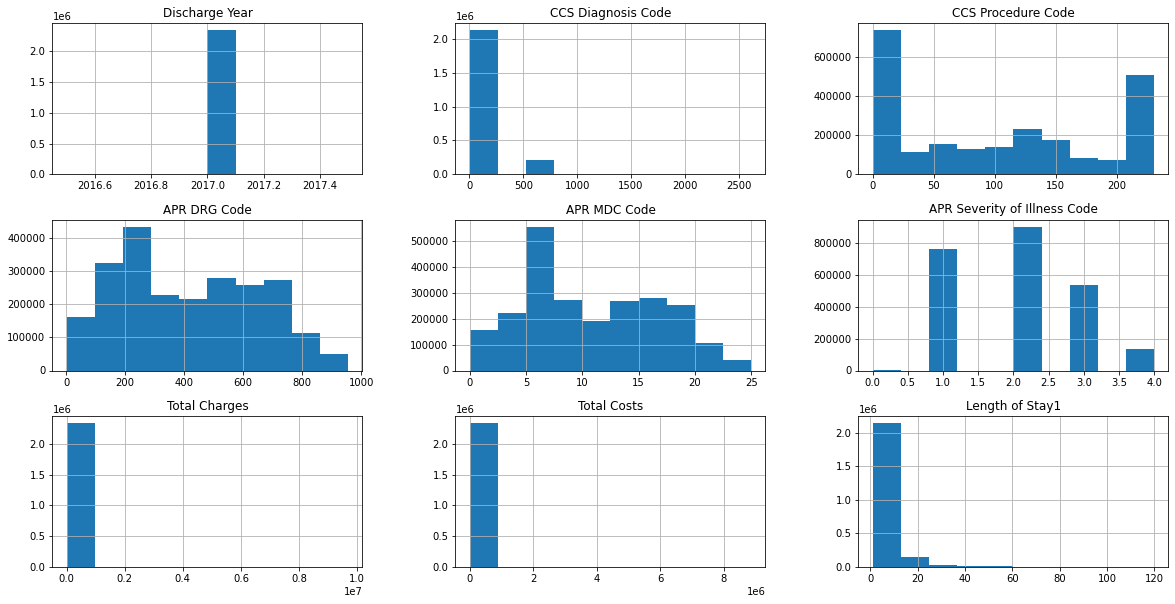

In [11]:
df.hist(figsize = (20,10))

<AxesSubplot:xlabel='Gender', ylabel='Length of Stay1'>

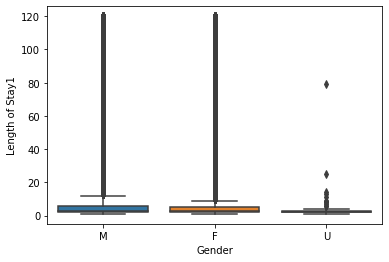

In [12]:
sns.boxplot(data =df ,x = 'Gender',y = 'Length of Stay1')

- There seems to be another value in the gender column (U)

<AxesSubplot:xlabel='Ethnicity', ylabel='Discharge Year'>

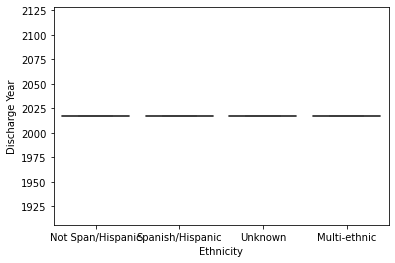

In [13]:
sns.boxplot(data =df ,x = 'Ethnicity',y = 'Discharge Year')

In [14]:
#df['Ethnicity'].unique()
#for i in df.columns:
#   print(f'{i} = {df[i].unique()}')
#    print('\n|--------------------------------------------------------------------------|\n')
print(df['CCS Diagnosis Code'].value_counts())
df['CCS Diagnosis Description'].value_counts()

218.0    219894
2.0      117175
99.0      73867
203.0     70865
657.0     54465
          ...  
194.0        23
86.0         22
206.0        21
174.0        11
663.0         3
Name: CCS Diagnosis Code, Length: 263, dtype: int64


Liveborn                                                            219894
Septicemia (except in labor)                                        117175
Hypertension with complications and secondary hypertension           73867
Osteoarthritis                                                       70865
Mood disorders                                                       54465
                                                                     ...  
Forceps delivery                                                        23
Cataract                                                                22
Osteoporosis                                                            21
Female infertility                                                      11
Screening and history of mental health and substance abuse codes         3
Name: CCS Diagnosis Description, Length: 263, dtype: int64

- APR MDC Code and APR MDC Description columns are the same
- APR DRG Code and APR DRG Description columns are also the same  
- CCS Diagnosis Code and CCS Diagnosis Description columns are also the same 
- CCS Procedure Code and CCS Procedure Description columns are the same so i will drop one of each columns in a Pre-training Data cleaning 

White                     1317040
Other Race                 590915
Black/African American     411487
Multi-racial                24127
Name: Race, dtype: int64


<AxesSubplot:>

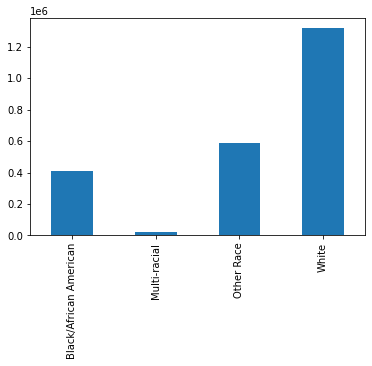

In [15]:
print(df['Race'].value_counts())
df['Race'].value_counts().sort_index().plot(kind ='bar')

- There is the White race is more than the others this could cause the model to be bias 

Not Span/Hispanic    1895664
Spanish/Hispanic      297871
Unknown               141116
Multi-ethnic            8918
Name: Ethnicity, dtype: int64


<AxesSubplot:>

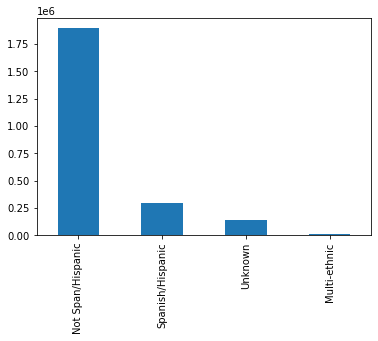

In [16]:
print(df['Ethnicity'].value_counts())
df['Ethnicity'].value_counts().plot(kind ='bar')

- The Ethnicity column shares the same problem as the Race column (Extreme Bias)

N    2340218
Y       3351
Name: Abortion Edit Indicator, dtype: int64


<AxesSubplot:>

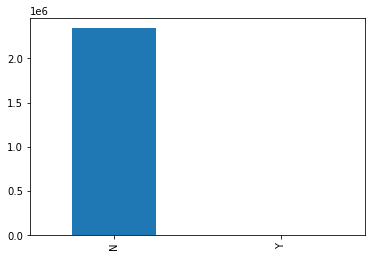

In [17]:
print(df['Abortion Edit Indicator'].value_counts())
df['Abortion Edit Indicator'].value_counts().plot(kind ='bar')

- There is also Extreme bias in the Abortion Edit Indicator column has shown above 

2017.0    2343569
Name: Discharge Year, dtype: int64


<AxesSubplot:>

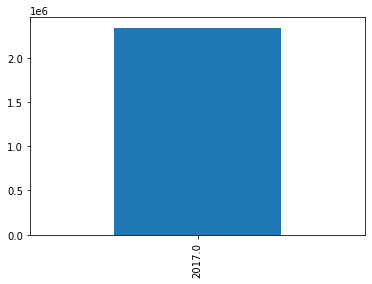

In [18]:
print(df['Discharge Year'].value_counts())
df['Discharge Year'].value_counts().plot(kind ='bar')

- the Discharge Year column is useless its just one year(2017) i shall remove it during the Pre-training Data-cleaning

F    1296954
M    1046540
U         75
Name: Gender, dtype: int64


<AxesSubplot:>

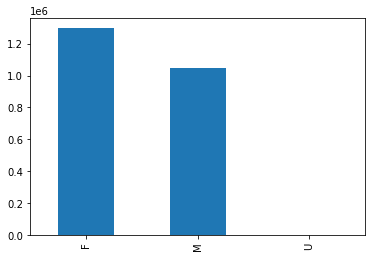

In [19]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind ='bar')

- The Unknown values will be dealt with in the Pre-training Data-cleaning

## Pre-training Data-Cleaning

In [20]:
#var = df['Gender'].mode()
#df['Gender'].replace('U',np.nan,inplace = True)
#df['Gender'].fillna(var,inplace = True)
#print(df['Gender'].value_counts())
#print(df['Gender'].isna().sum())


In [21]:
y = df['Length of Stay1']
df = df.drop(['Discharge Year','CCS Diagnosis Description','CCS Procedure Description', 'APR DRG Description','APR MDC Description','Length of Stay1'], axis =1 )
cat_list2 = [words for words in df.columns if df[words].dtype == 'object' ]
df = pd.get_dummies(data = df, columns = cat_list2,drop_first = True)
X = df
print(X.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

(2343569, 134)


- Spliting the model into train and test datasets 

In [22]:
X_train1,X_val,y_train1,y_val = train_test_split(X_train,y_train,test_size = 0.3)

- Then i split it into train and validation set for the training and hypertuning 

In [25]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [26]:
y_val_pred = dtr.predict(X_val)
print(r2_score(y_val ,y_val_pred))

0.7634111663979846
